# Graduation Project using VGG16 Archietecture


---




## Connect Colab to Drive to access the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Libraries

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os 
np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


# DataSet

## 2.0 Open Folders

In [ ]:
Insect_Allergy = '/content/drive/MyDrive/Graduation Project DataSet/أمراض الجلدية/Insect Allergy'
Bacterial_infection = '/content/drive/MyDrive/Graduation Project DataSet/أمراض الجلدية/Bacterial infection'

## 2.2 Check Images Size

### Insect Allergy

In [ ]:
# image_size = []

# for img in os.listdir(Insect_Allergy):
#         img = plt.imread(os.path.join(Insect_Allergy, img))
#         image_size.append(img.shape)
        
# pd.Series(image_size).value_counts()  

(1440, 3200, 3)    37
(4000, 3000, 3)    37
(1280, 960, 3)     19
(1280, 958, 3)     18
(4608, 3456, 3)    14
(3000, 4000, 3)    10
(4624, 3468, 3)     8
(3468, 4624, 3)     8
(3456, 4608, 3)     7
(1280, 1280, 3)     6
(2448, 3264, 3)     5
(3200, 1440, 3)     5
(155, 326, 3)       5
(3264, 2448, 3)     3
(194, 259, 3)       3
(183, 275, 3)       2
(259, 194, 3)       2
(165, 305, 3)       1
(170, 297, 3)       1
(1218, 1697, 3)     1
(186, 272, 3)       1
(1755, 831, 3)      1
(183, 276, 3)       1
(188, 268, 3)       1
(141, 300, 3)       1
(138, 364, 3)       1
(159, 318, 3)       1
(225, 225, 3)       1
(250, 201, 3)       1
(1113, 852, 3)      1
dtype: int64

### Bacterial Infection



In [ ]:
# image_size = []

# for img in os.listdir(Bacterial_infection):
#         img = plt.imread(os.path.join(Bacterial_infection, img))
#         image_size.append(img.shape)
        
# pd.Series(image_size).value_counts()

(1440, 3200, 3)    26
(1280, 960, 3)      7
(1280, 1280, 3)     7
(3456, 4608, 3)     6
(1280, 958, 3)      6
(2448, 3264, 3)     5
(3200, 1440, 3)     4
(4624, 3468, 3)     3
(4608, 3456, 3)     3
(4000, 3000, 3)     2
(3000, 4000, 3)     1
(4095, 1216, 3)     1
(1902, 1963, 3)     1
(2238, 1461, 3)     1
(3468, 4624, 3)     1
(4095, 1281, 3)     1
(1370, 2661, 3)     1
dtype: int64

## 2.3 Label each Class

In [ ]:

folders = {
    # 'key', 'value'
    Insect_Allergy: 0,
    Bacterial_infection: 1
}

for key, value in folders.items():
    print(f'The Label of Class {key.split()[-1]} is: {value}')

The Label of Class Allergy is: 0
The Label of Class infection is: 1


## 2.4 Reading Images



In [ ]:
import cv2
import random


folders_paths = [Insect_Allergy, Bacterial_infection]
SIZE = 200

Data = []
Label = []

for folder in folders_paths:
    #x = 0
    for image in os.listdir(folder):
        #x +=1
        image = cv2.imread(os.path.join(folder, image))
        image_array = cv2.resize(image, (SIZE, SIZE))
        Data.append(image_array)
        Label.append(folders[folder])
        
        # if x == 438:
        #     break

## 2.4 Check Number of images

In [ ]:
print(f'The total Number of images is: {len(Data)} image')
print(f'The total Number of labels is: {len(Label)} Label')
print(Data[0].shape)

The total Number of images is: 278 image
The total Number of labels is: 278 Label
(200, 200, 3)


## 2.5 Sample of Data

In [ ]:
print(Data[0])  
print(Label[0])
print(f'Type of Reading Images is {type(Data)}')

[[[129 120 116]
  [131 125 120]
  [139 132 129]
  ...
  [187 176 168]
  [190 180 170]
  [184 178 167]]

 [[127 124 116]
  [130 127 119]
  [137 134 126]
  ...
  [193 181 175]
  [195 183 177]
  [191 180 172]]

 [[133 131 123]
  [137 134 129]
  [133 130 123]
  ...
  [199 187 181]
  [196 184 178]
  [196 182 176]]

 ...

 [[ 11   6  16]
  [ 15   9  26]
  [ 15  13  29]
  ...
  [155 151 155]
  [156 154 154]
  [156 154 153]]

 [[  8   3  12]
  [ 12   5  18]
  [ 12   7  22]
  ...
  [155 153 153]
  [160 156 155]
  [152 153 144]]

 [[ 12   7  16]
  [ 11   5  16]
  [ 12   5  18]
  ...
  [156 152 151]
  [162 157 156]
  [153 150 142]]]
0
Type of Reading Images is <class 'list'>


## 2.6 Visualize some images

In [ ]:
folders_name = {
        # 'Key' : value 
        'Insect_Allergy': 0,
        'Bacterial_infection': 1  
    }

def get_folder_name(x):
    # function to return class name
    for key, value in folders_name.items():
        if x == value:
            return key


plt.figure(figsize=(24,24))
for n , i in enumerate(list(np.random.randint(0,len(Data),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(Data[i])   
    plt.axis('off')
    plt.title(get_folder_name(Label[i]))

## 2.7 Convert Data to Array

In [ ]:
Data = np.array(Data)
Label = np.array(Label)

print(f'Data shape is {Data.shape}')
print(f'Label shape  is {Label.shape}')

Data shape is (278, 200, 200, 3)
Label shape  is (278,)


## 2.8 Train and Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data, Label, test_size=0.25, random_state=2)

In [ ]:
print(f'X_train shape is {X_train.shape}')
print(f'X_test shape is {X_test.shape}')
print(f'y_train shape is {y_train.shape}')
print(f'y_test shape is {y_test.shape}')

X_train shape is (208, 200, 200, 3)
X_test shape is (70, 200, 200, 3)
y_train shape is (208,)
y_test shape is (70,)


## 2.9 Normalization

In [ ]:
# Normalization
X_train_Norm = X_train / 255.0
X_test_Norm = X_test / 255.0

# Transfer Learning
# VGG

In [ ]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(200, 200, 3))

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 256)               4718848   
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 19,434,564
Trainable params: 19,434,564
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print('This is the number of trainable weights ' 'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [ ]:
conv_base.trainable = False

In [ ]:
print('This is the number of trainable weights ' 'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 30


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 256)               4718848   
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 19,434,564
Trainable params: 4,719,876
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
%%time
history = model.fit(X_train, y_train, batch_size = 32, epochs = 20, validation_data = (X_test, y_test))


Epoch 1/20
7/7 [==============================] - 26s 1s/step - loss: 38.5743 - accuracy: 0.6346 - val_loss: 8.3850 - val_accuracy: 0.1857
Epoch 2/20
7/7 [==============================] - 2s 357ms/step - loss: 2.1658 - accuracy: 0.5433 - val_loss: 0.5893 - val_accuracy: 0.8286
Epoch 3/20
7/7 [==============================] - 2s 358ms/step - loss: 1.0933 - accuracy: 0.6202 - val_loss: 0.5971 - val_accuracy: 0.8143
Epoch 4/20
7/7 [==============================] - 2s 356ms/step - loss: 0.6968 - accuracy: 0.6827 - val_loss: 0.5352 - val_accuracy: 0.8143
Epoch 5/20
7/7 [==============================] - 2s 361ms/step - loss: 0.6288 - accuracy: 0.6971 - val_loss: 0.6362 - val_accuracy: 0.8143
Epoch 6/20
7/7 [==============================] - 2s 348ms/step - loss: 0.6263 - accuracy: 0.6971 - val_loss: 0.4783 - val_accuracy: 0.8000
Epoch 7/20
7/7 [==============================] - 2s 348ms/step - loss: 0.6159 - accuracy: 0.7019 - val_loss: 0.5230 - val_accuracy: 0.8000
Epoch 8/20
7/7 [=====

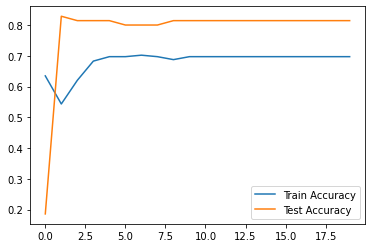

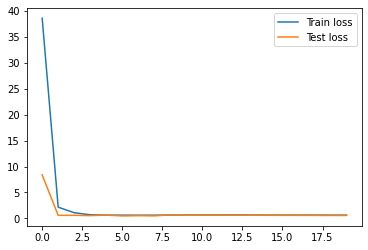

In [ ]:
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Test Accuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label = 'Train loss')
plt.plot(history.history['val_loss'], label = 'Test loss')
plt.legend()
plt.show()